In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
def confidence_interval(data, percentage=95):
    if percentage == 95:
        z = 1.96
    else:
        raise(ValueError("frero..."))
    
    std = np.std(data)
    N = data.shape[0]

    diff = z * std/np.sqrt(N)

    return diff

# bdd 1

In [62]:
bdd = pd.read_csv("/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/summary/bdd_2023-09-11_cingulate_bayes.csv", index_col=0)
bdd = bdd.sort_values(by=['best_test_auc'], ascending=False)
bdd.head()

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss
36,/volatile2/jc225751/Runs/61_classifier_regress...,0.941289,0.516694,0.516883,0.593813,0.607856,0.591053,0.056918,0.898736,0.001552,87.641098
17,/volatile2/jc225751/Runs/61_classifier_regress...,0.500000,0.500000,0.500000,0.536041,0.593126,0.569120,0.112401,0.787333,0.004144,138.623108
22,/volatile2/jc225751/Runs/61_classifier_regress...,0.995380,0.597054,0.505628,0.722488,0.597054,0.564502,0.060940,0.854419,0.000453,71.937592
41,/volatile2/jc225751/Runs/61_classifier_regress...,0.578174,0.565630,0.570274,0.570467,0.611293,0.559452,0.159192,0.772428,0.003910,138.613052
3,/volatile2/jc225751/Runs/61_classifier_regress...,0.558088,0.530933,0.520346,0.567477,0.573486,0.552958,0.253519,0.822702,0.001531,138.589890


In [4]:
len(bdd)

45

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
36,/volatile2/jc225751/Runs/61_classifier_regress...,0.941289,0.516694,0.516883,0.593813,0.607856,0.591053,0.056918,0.898736,0.001552,87.641098,0.798331,1.391207,0.592876,-4.265660,-0.833341,-6.650063,-3.127816
17,/volatile2/jc225751/Runs/61_classifier_regress...,0.500000,0.500000,0.500000,0.536041,0.593126,0.569120,0.112401,0.787333,0.004144,138.623108,0.870833,1.000000,0.129167,-2.863214,-4.605170,-5.099319,-4.271634
22,/volatile2/jc225751/Runs/61_classifier_regress...,0.995380,0.597054,0.505628,0.722488,0.597054,0.564502,0.060940,0.854419,0.000453,71.937592,0.931326,1.204218,0.272892,-2.075972,-0.895689,-4.349523,-1.757425
41,/volatile2/jc225751/Runs/61_classifier_regress...,0.578174,0.565630,0.570274,0.570467,0.611293,0.559452,0.159192,0.772428,0.003910,138.613052,0.818240,0.881284,0.063044,-3.198439,-3.792289,-5.620855,-3.888938
3,/volatile2/jc225751/Runs/61_classifier_regress...,0.558088,0.530933,0.520346,0.567477,0.573486,0.552958,0.253519,0.822702,0.001531,138.589890,0.859036,0.965289,0.106253,-5.114553,-3.292659,-7.181956,-4.046845


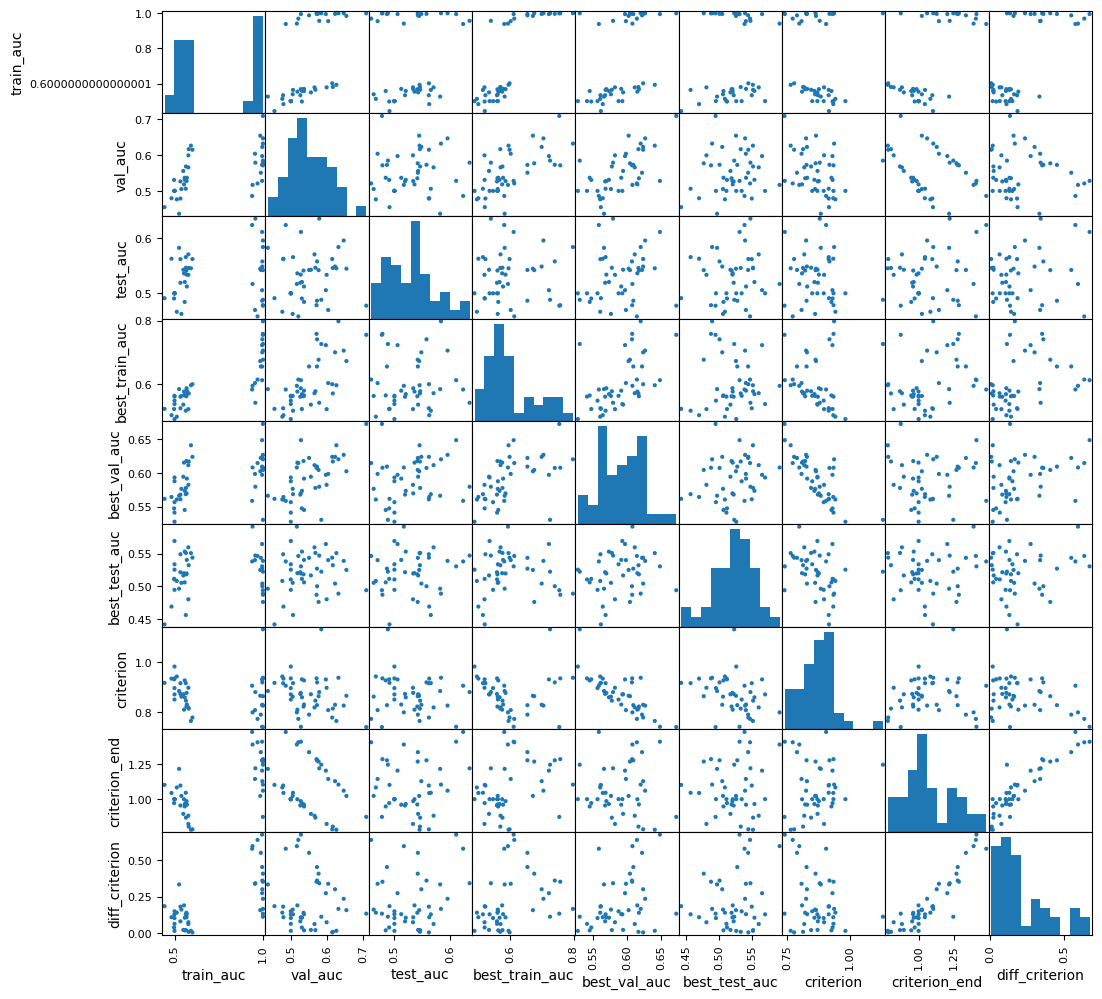

In [65]:
bdd["criterion"] = abs(bdd["best_val_auc"] - bdd["best_train_auc"]) + 2*(1-bdd["best_val_auc"])
bdd["criterion_end"] = abs(bdd["val_auc"] - bdd["train_auc"]) + 2*(1-bdd["val_auc"])
bdd["diff_criterion"] = abs(bdd["criterion"]-bdd["criterion_end"])
bdd["diff_best"] = np.log(abs(bdd["best_val_auc"] - bdd["best_train_auc"]))
bdd["diff_end"] = np.log(abs(bdd["val_auc"] - bdd["train_auc"])+0.01)
bdd["criterion2"] = np.log(abs(bdd["best_val_auc"] - bdd["best_train_auc"])) + np.log(0.7-bdd["best_val_auc"])
bdd["diff"] = np.log(abs(bdd["best_train_auc"] - 0.55))
obj = pd.plotting.scatter_matrix(bdd[['train_auc', 'val_auc', 'test_auc', 'best_train_auc', 'best_val_auc', 'best_test_auc', 'criterion', 'criterion_end', 'diff_criterion']],
                                 figsize=(12,12),
                                 alpha=1.0)
bdd.head()

In [73]:
bdd = bdd.sort_values(by=['criterion'], ascending=True)
print(bdd.head())
bdd.head()['model_path'].tolist()

                                           model_path  train_auc   val_auc  \
32  /volatile2/jc225751/Runs/61_classifier_regress...   0.999782  0.709002   
8   /volatile2/jc225751/Runs/61_classifier_regress...   0.995358  0.527987   
12  /volatile2/jc225751/Runs/61_classifier_regress...   0.592829  0.626187   
40  /volatile2/jc225751/Runs/61_classifier_regress...   0.969615  0.520786   
13  /volatile2/jc225751/Runs/61_classifier_regress...   0.601385  0.614730   

    test_auc  best_train_auc  best_val_auc  best_test_auc  drop_rate  \
32  0.477633        0.755089      0.672013       0.494084   0.117434   
8   0.610823        0.611669      0.648118       0.530447   0.126859   
12  0.545166        0.595631      0.640589       0.550649   0.080625   
40  0.458297        0.613614      0.614403       0.546320   0.203310   
13  0.561905        0.598914      0.623568       0.543723   0.125530   

       gamma        lr  train_loss  criterion  criterion_end  diff_criterion  \
32  0.914226  0.00

['/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-11_cingulate_bayes/18-44-23_221',
 '/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-11_cingulate_bayes/13-08-43_118',
 '/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-11_cingulate_bayes/14-25-39_213',
 '/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-11_cingulate_bayes/20-42-02_233',
 '/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-11_cingulate_bayes/14-27-31_95']

In [76]:
bdd[bdd.model_path=='/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/2023-09-11_cingulate_bayes/13-07-08_157']

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
6,/volatile2/jc225751/Runs/61_classifier_regress...,0.995643,0.572504,0.48658,0.654936,0.609165,0.526984,0.162722,0.756939,0.000434,105.598427,0.82744,1.278131,0.450691,-3.084113,-0.836696,-5.482827,-2.254405


Text(0, 0.5, 'best_test_auc')

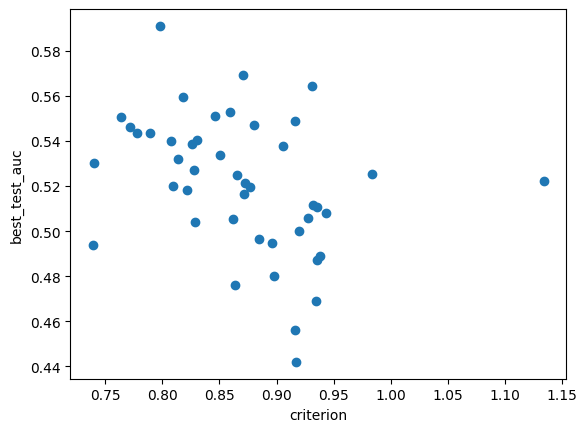

In [61]:
plt.scatter(bdd["criterion"], bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

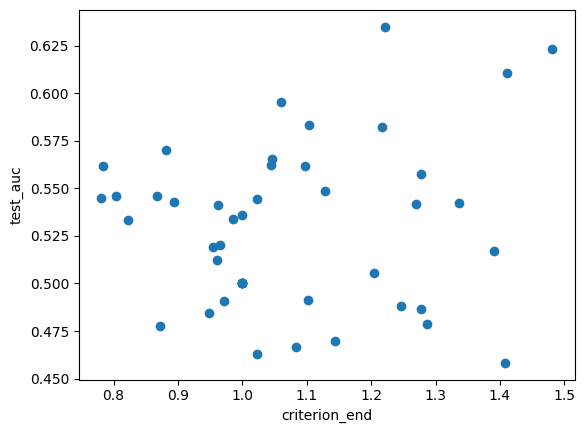

In [8]:
plt.scatter(bdd["criterion_end"], bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

In [9]:
quantile = []
test_auc = []
test_auc_cum = []
error_cum = []
error = []
delta=0.1
quantile_x = np.arange(delta,1+delta,delta)
print(quantile_x)
for q in quantile_x:
    one_quantile = bdd['criterion_end'].quantile(q=q)
    quantile.append(one_quantile)
    test_auc_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].mean())
    error_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].sem())
    if q==delta:
        test_auc.append(test_auc_cum[-1])
        error.append(error_cum[-1])
    else:
        test_auc.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].mean())
        error.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].sem())

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


(0.45, 0.6)

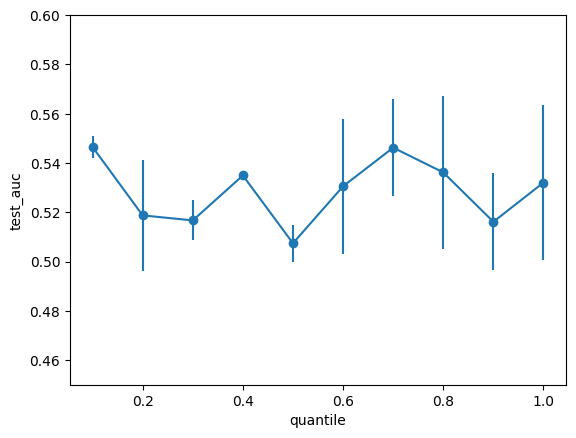

In [10]:
plt.errorbar(quantile_x, test_auc, error, marker='o')
plt.xlabel("quantile")
plt.ylabel("test_auc")
plt.ylim((0.45,0.6))

(0.45, 0.6)

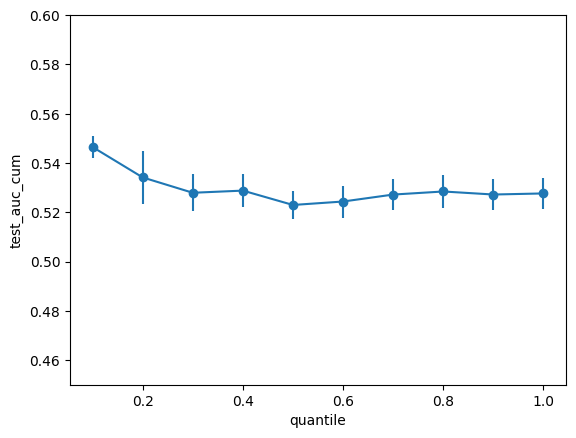

In [11]:
plt.errorbar(quantile_x, test_auc_cum, error_cum, marker='o')
plt.xlabel("quantile")
plt.ylabel("test_auc_cum")
plt.ylim((0.45,0.6))

Text(0, 0.5, 'test_auc')

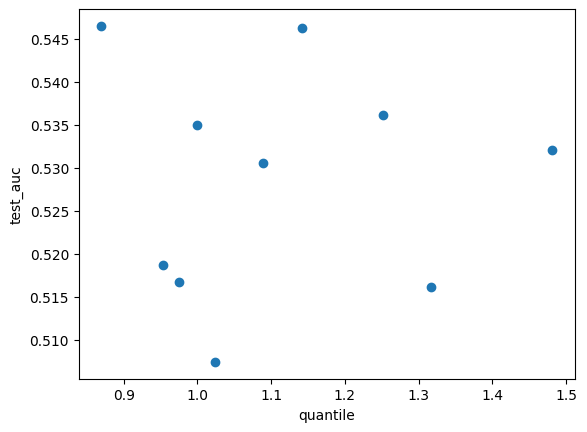

In [12]:
plt.scatter(quantile, test_auc)
plt.xlabel("quantile")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

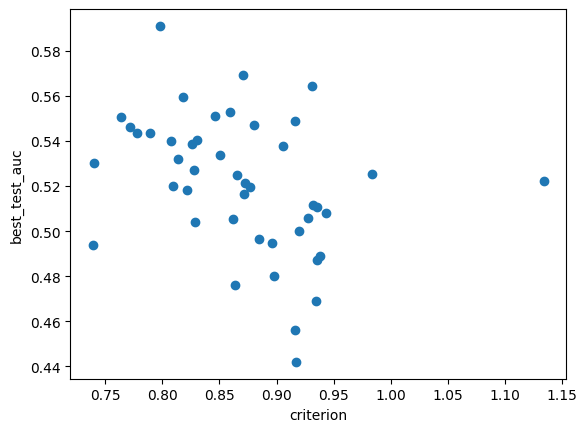

In [13]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

In [14]:
best_quantile = []
best_test_auc = []
for q in quantile_x:
    one_quantile = bdd['criterion'].quantile(q=q)
    best_quantile.append(one_quantile)
    best_test_auc.append(bdd[bdd['criterion'] < one_quantile]['best_test_auc'].mean())

Text(0, 0.5, 'best_test_auc')

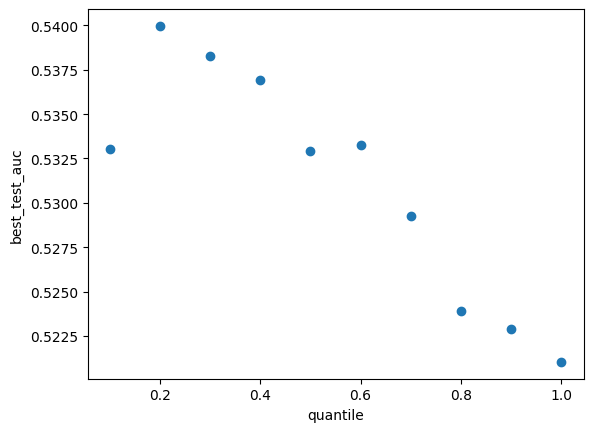

In [15]:
plt.scatter(quantile_x, best_test_auc)
plt.xlabel("quantile")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'val_auc')

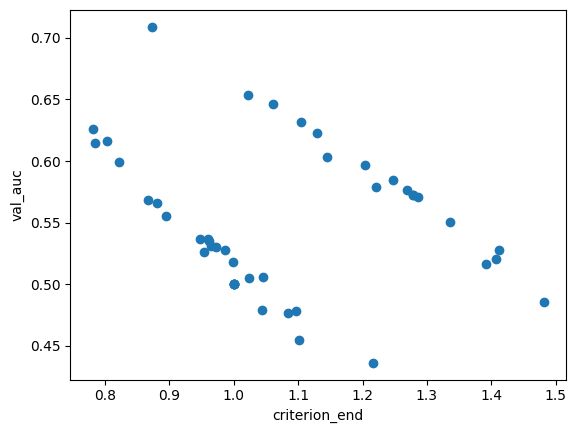

In [16]:
plt.scatter(bdd["criterion_end"], bdd.val_auc)
plt.xlabel("criterion_end")
plt.ylabel("val_auc")

Text(0, 0.5, 'train_auc')

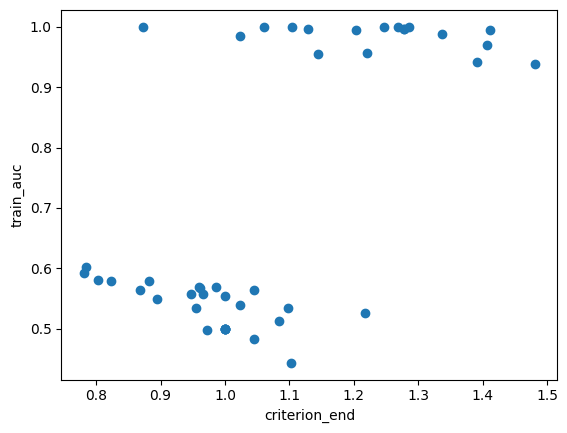

In [17]:
plt.scatter(bdd["criterion_end"], bdd.train_auc)
plt.xlabel("criterion_end")
plt.ylabel("train_auc")

In [18]:
bdd.sort_values(by=['test_auc'], ascending=False)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
0,/volatile2/jc225751/Runs/61_classifier_regress...,0.957123,0.578723,0.634921,0.540127,0.579542,0.546898,0.107037,0.761761,0.000692,113.382477,0.880331,1.220953,0.340622,-3.233626,-0.945720,-5.350078,-4.617992
29,/volatile2/jc225751/Runs/61_classifier_regress...,0.938998,0.485925,0.623377,0.582163,0.558756,0.537951,0.064960,0.837532,0.001303,94.461594,0.905894,1.481224,0.575329,-3.754736,-0.769871,-5.712004,-3.436946
8,/volatile2/jc225751/Runs/61_classifier_regress...,0.995358,0.527987,0.610823,0.611669,0.648118,0.530447,0.126859,0.922136,0.000469,83.410606,0.740214,1.411397,0.671184,-3.311836,-0.739462,-6.270616,-2.785980
31,/volatile2/jc225751/Runs/61_classifier_regress...,1.000000,0.646481,0.595382,0.705242,0.626514,0.538817,0.076065,0.852858,0.000297,76.061241,0.825700,1.060556,0.234857,-2.541760,-1.011924,-5.152419,-1.862772
26,/volatile2/jc225751/Runs/61_classifier_regress...,1.000000,0.631915,0.583550,0.797958,0.619967,0.488889,0.150967,0.961611,0.000104,84.122940,0.938057,1.104255,0.166199,-1.726022,-0.972636,-4.251342,-1.394495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,/volatile2/jc225751/Runs/61_classifier_regress...,0.999782,0.709002,0.477633,0.755089,0.672013,0.494084,0.117434,0.914226,0.000294,70.995522,0.739050,0.872777,0.133727,-2.487999,-1.201374,-6.064017,-1.584310
34,/volatile2/jc225751/Runs/61_classifier_regress...,0.955223,0.603601,0.469841,0.602497,0.598363,0.539971,0.217806,0.817840,0.000335,115.679527,0.807407,1.144421,0.337014,-5.488620,-1.017155,-7.774971,-2.947001
39,/volatile2/jc225751/Runs/61_classifier_regress...,0.512868,0.476432,0.466667,0.496177,0.560720,0.508225,0.226378,0.830888,0.009960,138.653641,0.943103,1.083571,0.140468,-2.740415,-3.069693,-4.711685,-2.922046
5,/volatile2/jc225751/Runs/61_classifier_regress...,0.538926,0.505237,0.462771,0.561716,0.576432,0.505339,0.113706,0.935760,0.004758,138.661835,0.861852,1.023214,0.161362,-4.218812,-3.130677,-6.309777,-4.446803


Text(0, 0.5, 'best_test_auc')

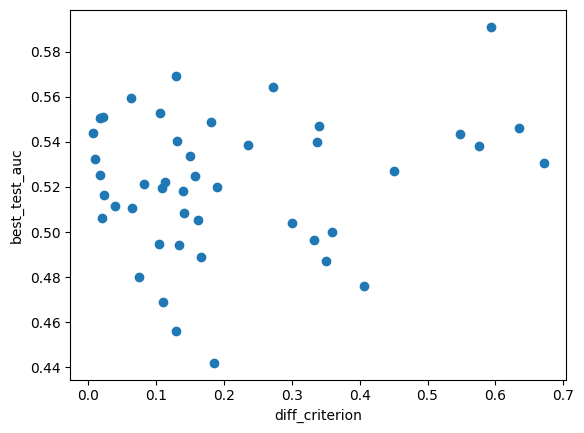

In [19]:
plt.scatter(bdd["diff_criterion"], bdd.best_test_auc)
plt.xlabel("diff_criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

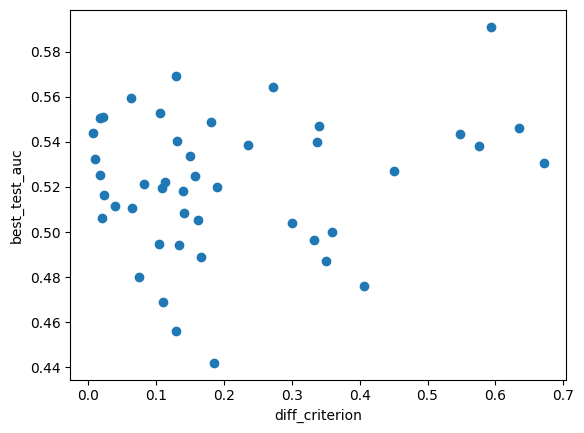

In [20]:
plt.scatter(bdd["diff_criterion"], bdd.best_test_auc)
plt.xlabel("diff_criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

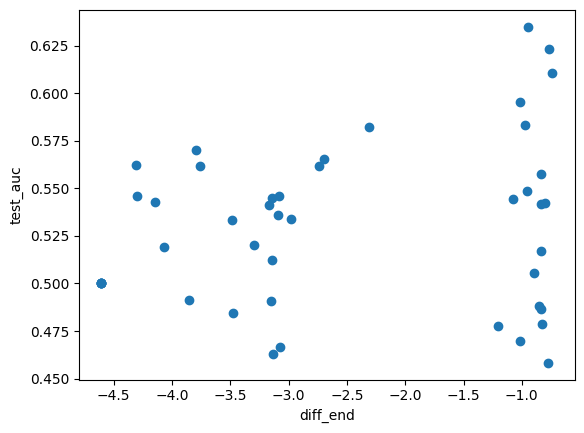

In [21]:
plt.scatter(bdd["diff_end"], bdd.test_auc)
plt.xlabel("diff_end")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

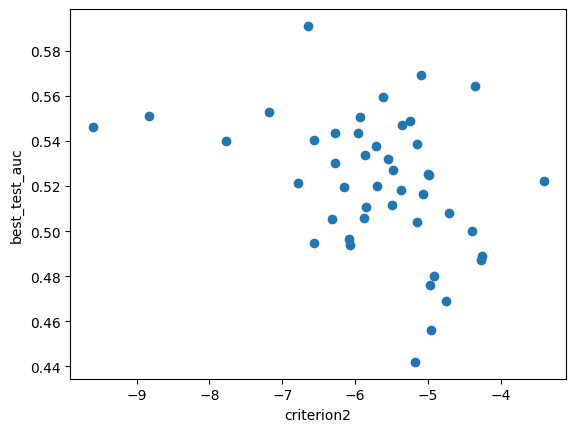

In [22]:
plt.scatter(bdd["criterion2"], bdd.best_test_auc)
plt.xlabel("criterion2")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

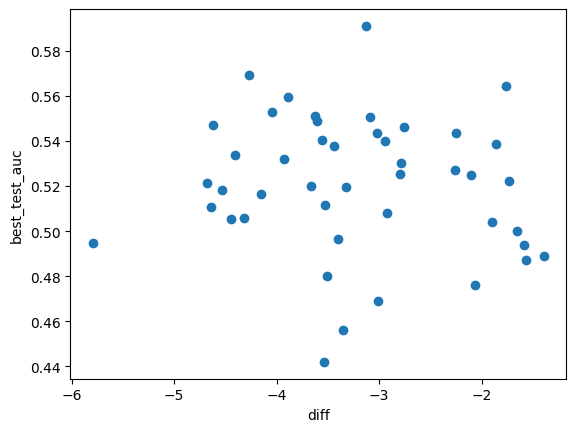

In [23]:
plt.scatter(bdd["diff"], bdd.best_test_auc)
plt.xlabel("diff")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

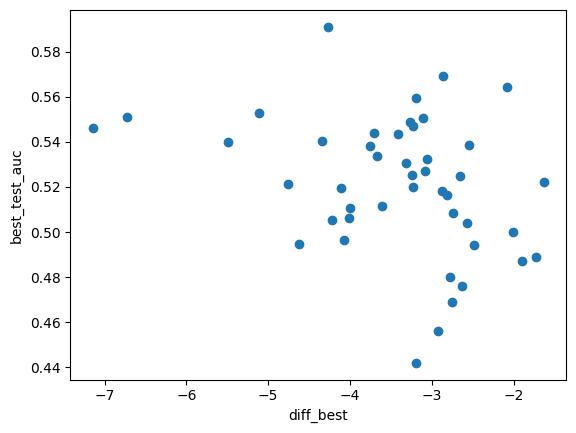

In [24]:
plt.scatter(bdd["diff_best"], bdd.best_test_auc)
plt.xlabel("diff_best")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_train_auc')

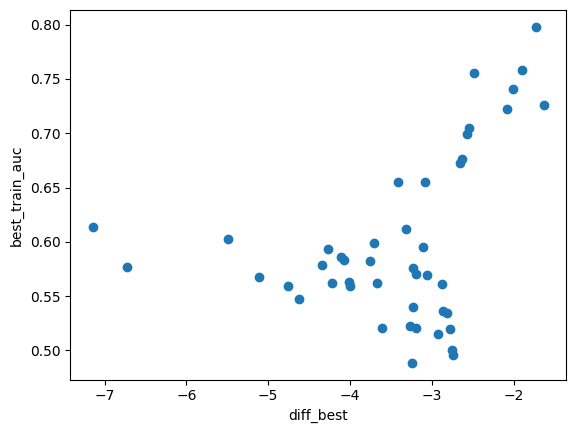

In [25]:
plt.scatter(bdd["diff_best"], bdd.best_train_auc)
plt.xlabel("diff_best")
plt.ylabel("best_train_auc")

Text(0, 0.5, 'best_test_auc')

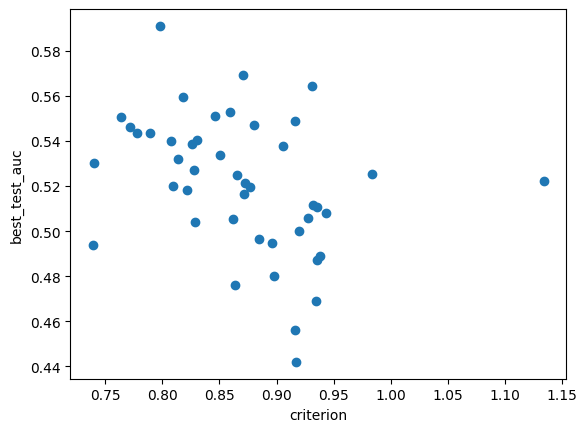

In [26]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_val_auc')

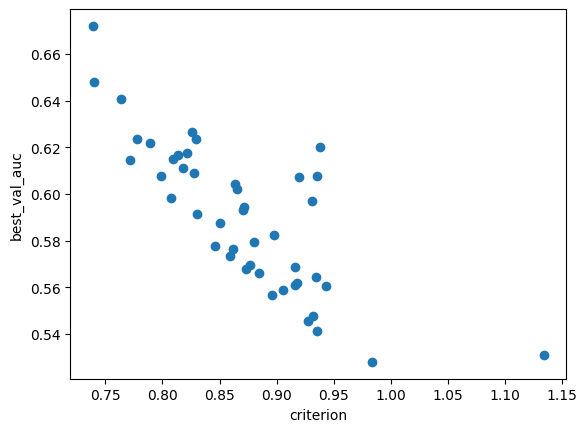

In [27]:
plt.scatter(bdd.criterion, bdd.best_val_auc)
plt.xlabel("criterion")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'best_train_auc')

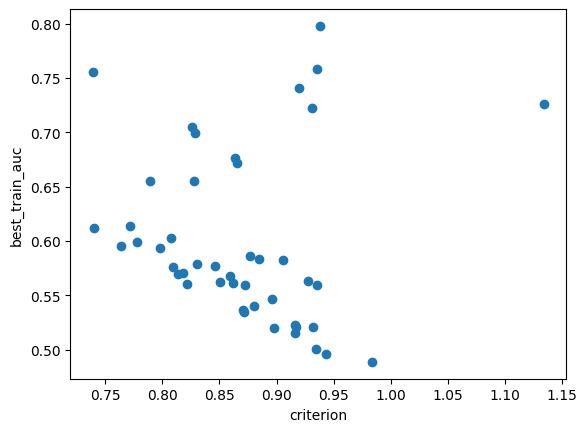

In [28]:
plt.scatter(bdd.criterion, bdd.best_train_auc)
plt.xlabel("criterion")
plt.ylabel("best_train_auc")

Text(0, 0.5, 'best_test_auc')

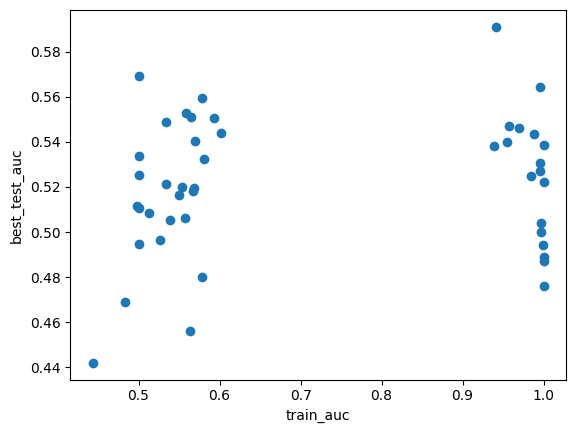

In [29]:
plt.scatter(bdd.train_auc, bdd.best_test_auc)
plt.xlabel("train_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

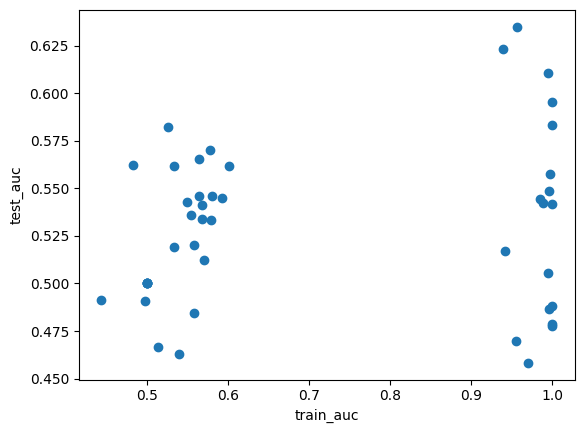

In [30]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

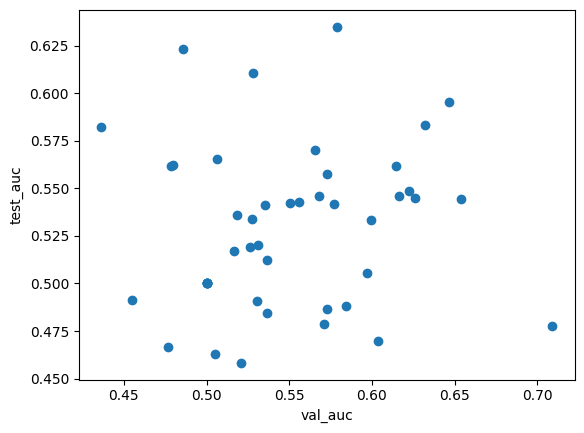

In [31]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

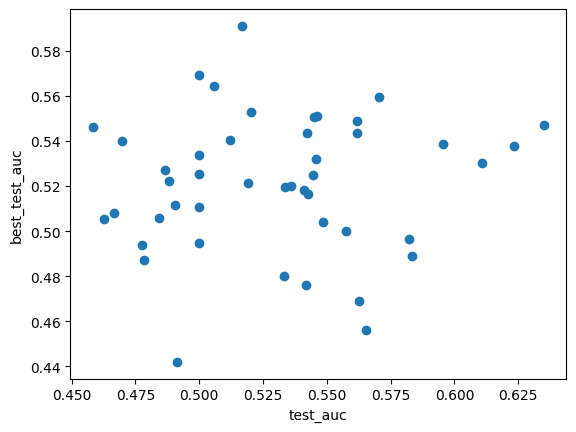

In [32]:
plt.scatter(bdd.test_auc, bdd.best_test_auc)
plt.xlabel("test_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_train_auc')

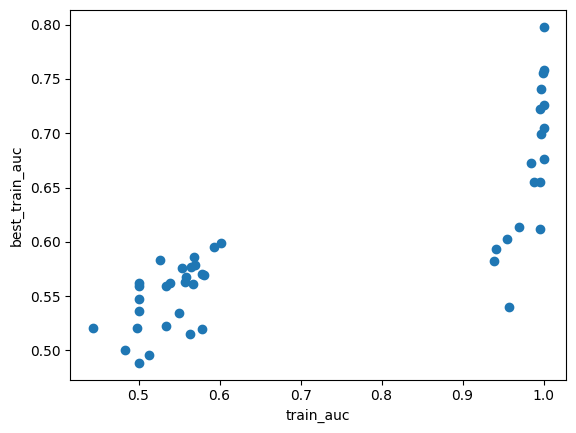

In [33]:
plt.scatter(bdd.train_auc, bdd.best_train_auc)
plt.xlabel("train_auc")
plt.ylabel("best_train_auc")

Text(0, 0.5, 'best_val_auc')

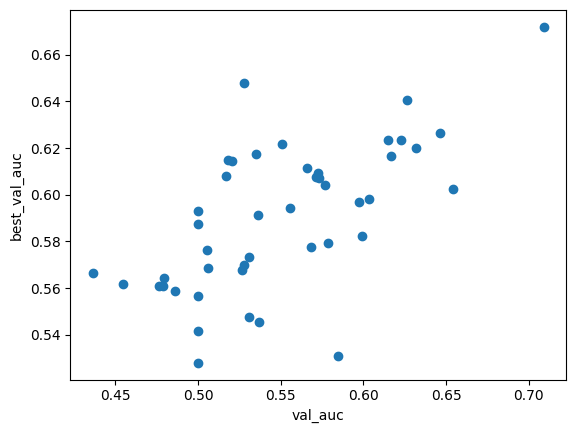

In [34]:
plt.scatter(bdd.val_auc, bdd.best_val_auc)
plt.xlabel("val_auc")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'test_auc')

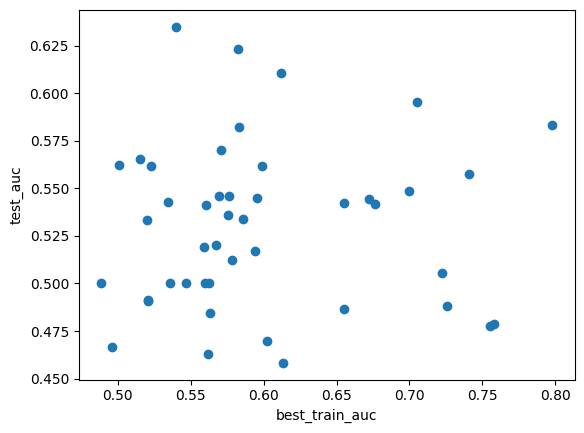

In [35]:
plt.scatter(bdd.best_train_auc, bdd.test_auc)
plt.xlabel("best_train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_val_auc')

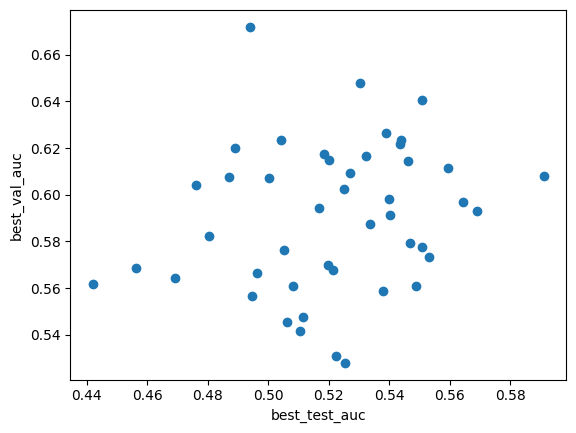

In [36]:
plt.scatter(bdd.best_test_auc, bdd.best_val_auc)
plt.xlabel("best_test_auc")
plt.ylabel("best_val_auc")

(0.4, 0.65)

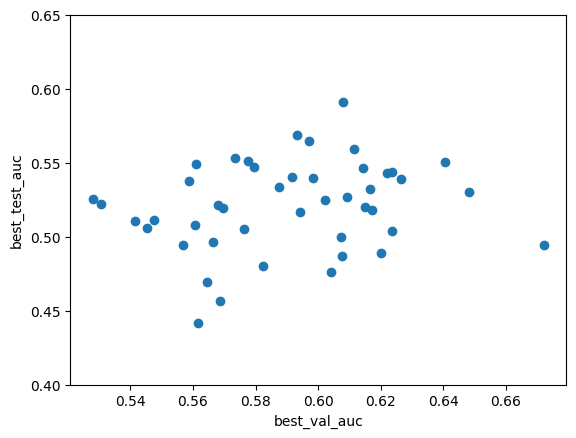

In [37]:
plt.scatter(bdd.best_val_auc, bdd.best_test_auc)
plt.xlabel("best_val_auc")
plt.ylabel("best_test_auc")
plt.ylim((0.4,0.65))

(0.4, 0.65)

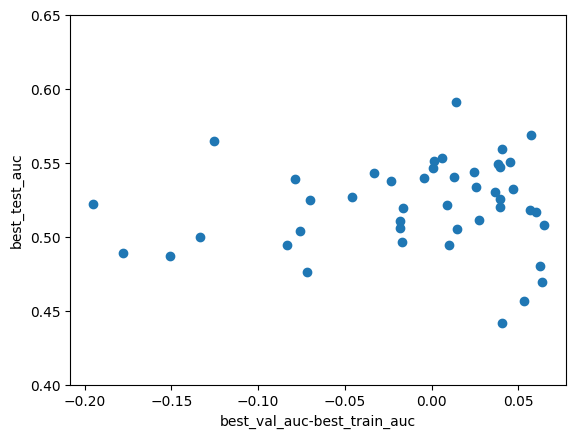

In [38]:
plt.scatter(bdd.best_val_auc-bdd.best_train_auc, bdd.best_test_auc)
plt.xlabel("best_val_auc-best_train_auc")
plt.ylabel("best_test_auc")
plt.ylim((0.4,0.65))

Text(0, 0.5, 'best_test_auc')

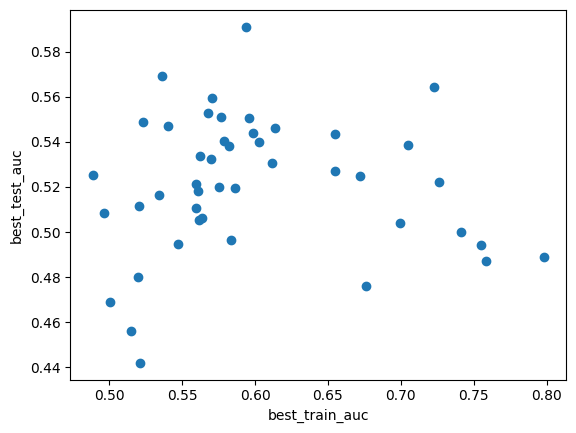

In [39]:
plt.scatter(bdd.best_train_auc, bdd.best_test_auc)
plt.xlabel("best_train_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_val_auc')

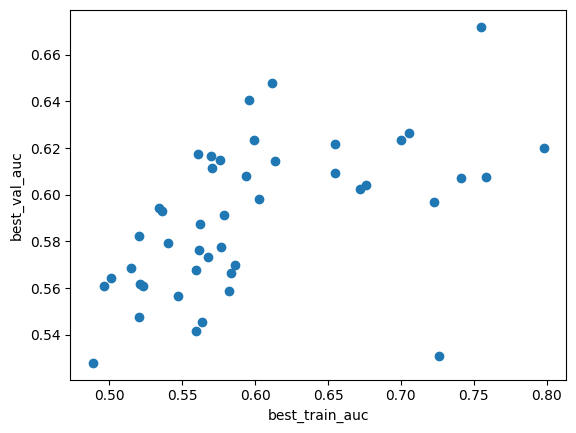

In [40]:
plt.scatter(bdd.best_train_auc, bdd.best_val_auc)
plt.xlabel("best_train_auc")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'criterion')

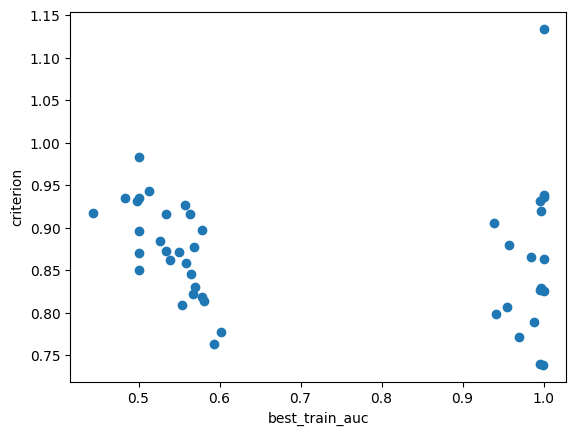

In [41]:
plt.scatter(bdd.train_auc, bdd.criterion)
plt.xlabel("best_train_auc")
plt.ylabel("criterion")

(0.7, 0.8)

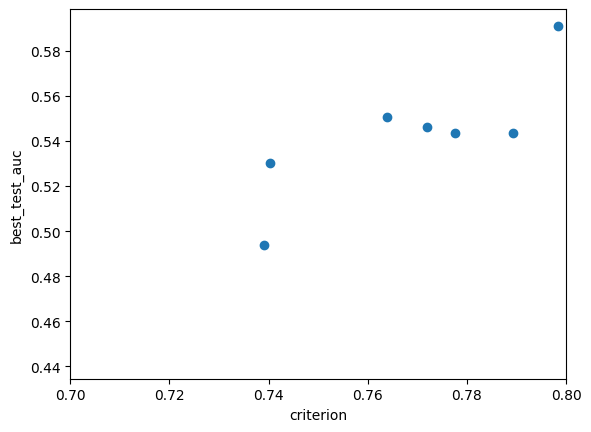

In [42]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")
plt.xlim((0.7,0.8))

(0.75, 0.9)

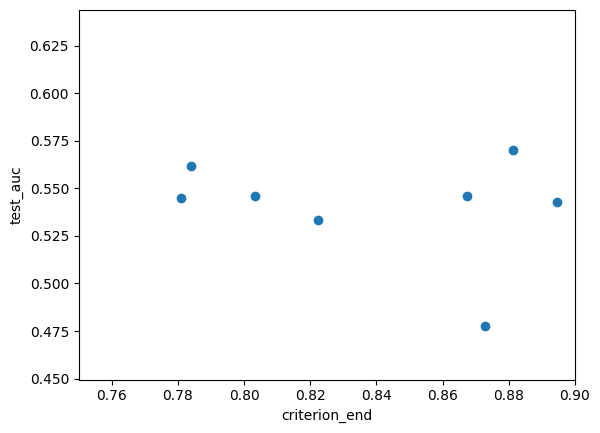

In [43]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")
plt.xlim((0.75,0.9))

Text(0, 0.5, 'best_test_auc')

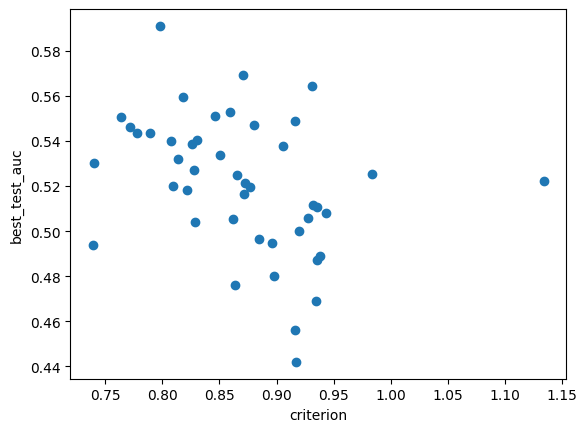

In [44]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

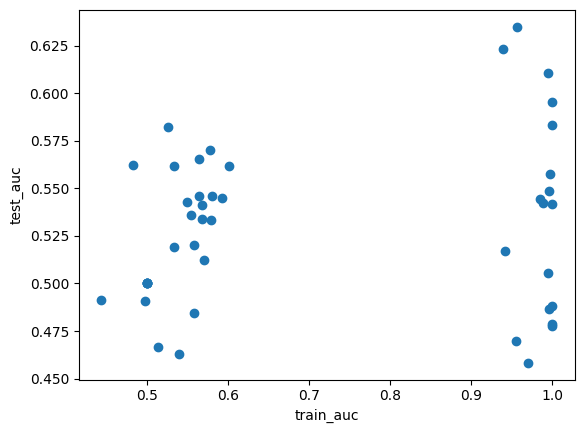

In [45]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

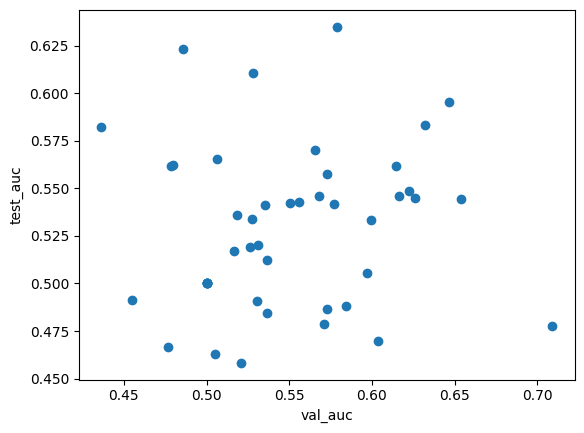

In [46]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

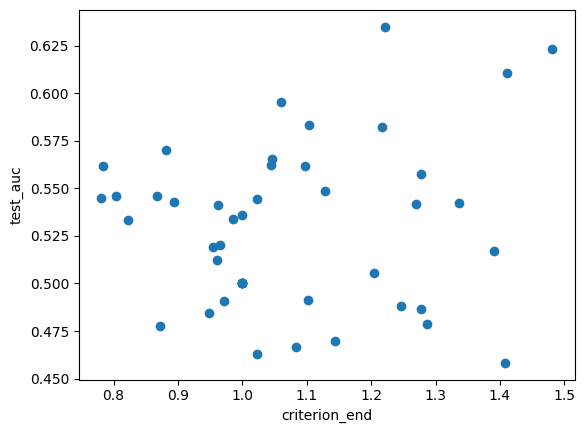

In [47]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

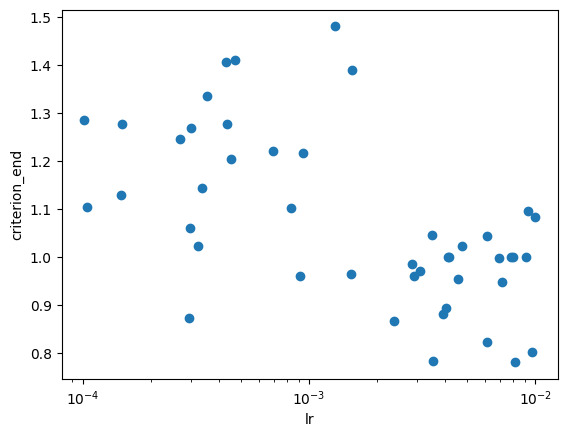

In [48]:
plt.scatter(bdd.lr, bdd.criterion_end)
plt.xlabel("lr")
plt.ylabel("criterion_end")
plt.xscale("log")

Text(0, 0.5, 'criterion_end')

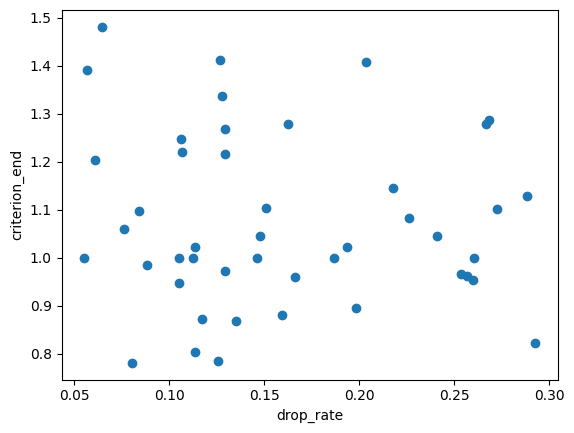

In [49]:
plt.scatter(bdd.drop_rate, bdd.criterion_end)
plt.xlabel("drop_rate")
plt.ylabel("criterion_end")

/tmp/ipykernel_1847603/1393031548.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


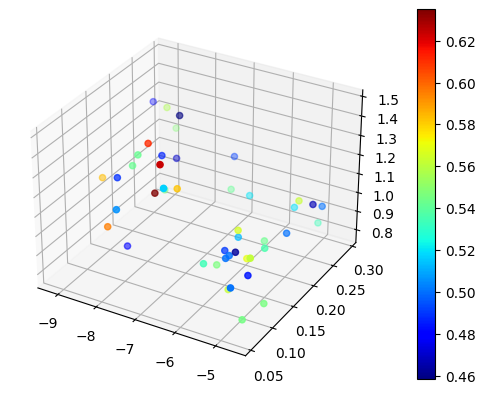

In [50]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
z = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
scat = ax.scatter(np.log(bdd.lr), bdd.drop_rate, z, c=scalarMap.to_rgba(cs))
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_1847603/3606356904.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


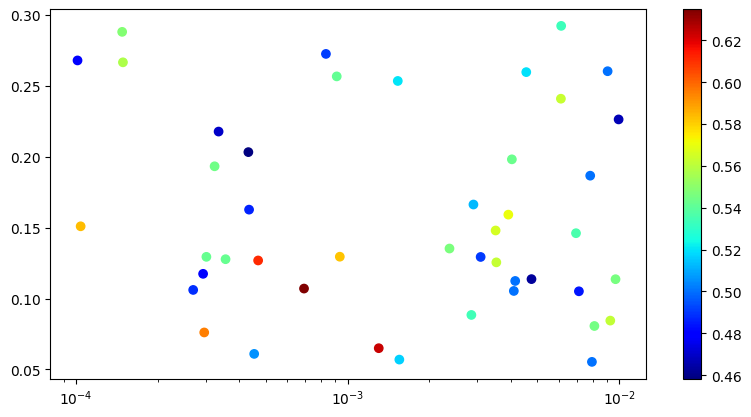

In [51]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_1847603/295477420.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


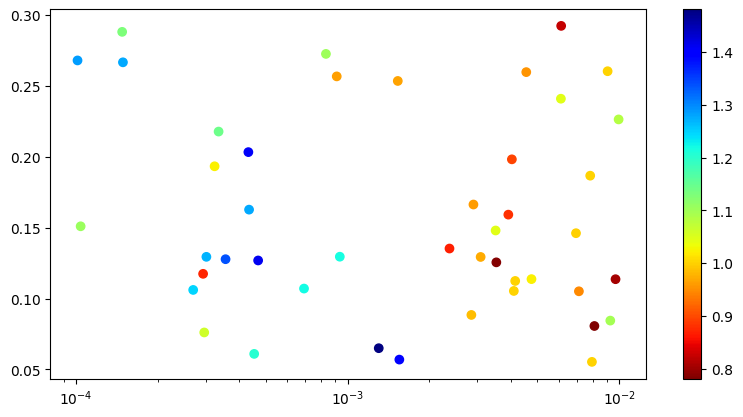

In [52]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet_r'
cm = plt.get_cmap(colorsMap)
cs = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

Text(0, 0.5, 'criterion_end')

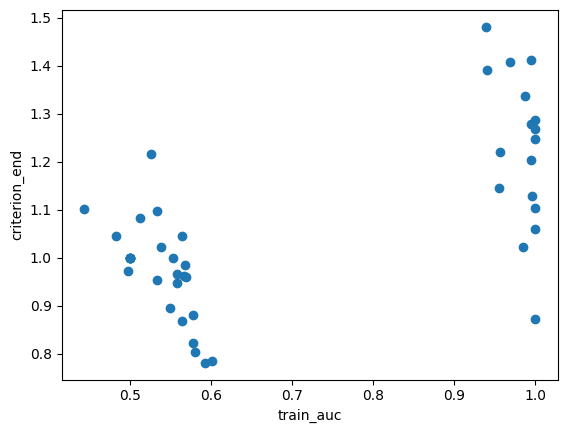

In [53]:
plt.scatter(bdd.train_auc, bdd.criterion_end)
plt.xlabel("train_auc")
plt.ylabel("criterion_end")

Text(0, 0.5, 'val_auc')

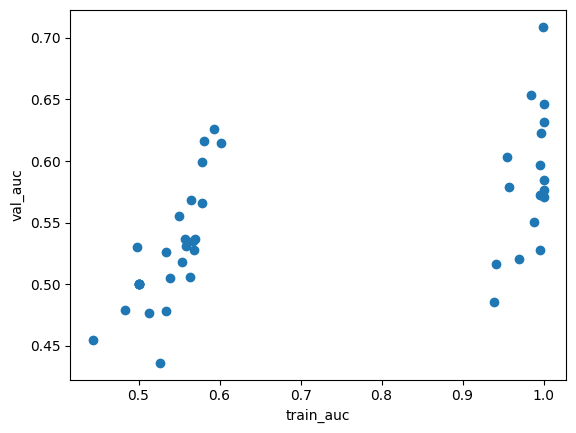

In [54]:
plt.scatter(bdd.train_auc, bdd.val_auc)
plt.xlabel("train_auc")
plt.ylabel("val_auc")

Text(0, 0.5, 'test_auc')

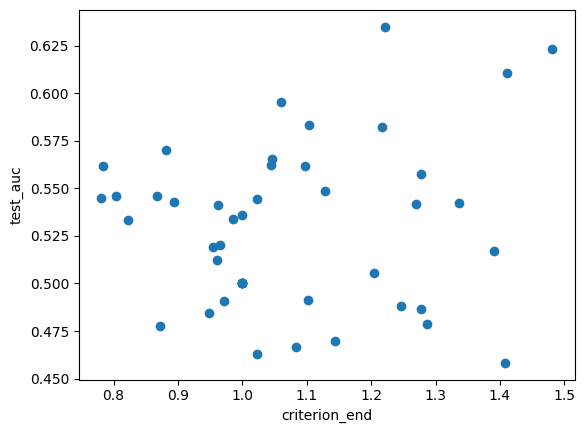

In [55]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

Text(0, 0.5, 'val_auc')

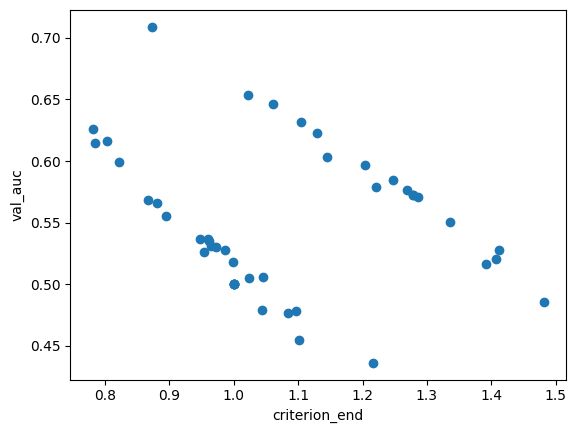

In [56]:
plt.scatter(bdd.criterion_end, bdd.val_auc)
plt.xlabel("criterion_end")
plt.ylabel("val_auc")

Text(0, 0.5, 'train_auc')

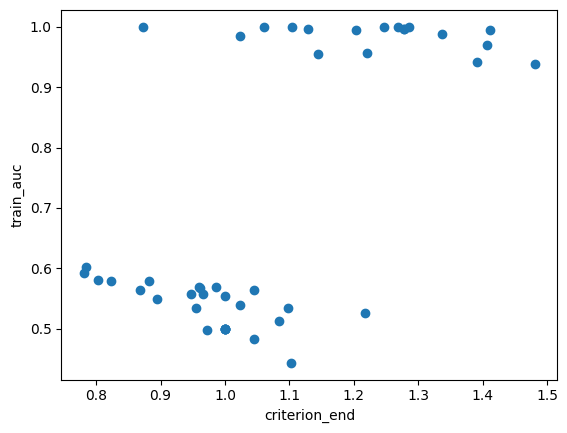

In [57]:
plt.scatter(bdd.criterion_end, bdd.train_auc)
plt.xlabel("criterion_end")
plt.ylabel("train_auc")

In [58]:
bdd.sort_values(by=['criterion_end'], ascending=True)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
12,/volatile2/jc225751/Runs/61_classifier_regress...,0.592829,0.626187,0.545166,0.595631,0.640589,0.550649,0.080625,0.794935,0.008111,138.632309,0.763780,0.780984,0.017204,-3.102027,-3.138282,-5.925306,-3.087163
13,/volatile2/jc225751/Runs/61_classifier_regress...,0.601385,0.614730,0.561905,0.598914,0.623568,0.543723,0.125530,0.765589,0.003532,138.162918,0.777518,0.783885,0.006367,-3.702812,-3.757381,-6.274164,-3.017695
21,/volatile2/jc225751/Runs/61_classifier_regress...,0.580337,0.616367,0.545743,0.569708,0.616694,0.532179,0.113640,0.792872,0.009703,138.662170,0.813598,0.803296,0.010302,-3.057915,-3.078480,-5.543149,-3.926711
11,/volatile2/jc225751/Runs/61_classifier_regress...,0.578414,0.599182,0.533333,0.520004,0.582324,0.480231,0.292379,0.877954,0.006120,138.622009,0.897672,0.822404,0.075268,-2.775466,-3.481305,-4.915286,-3.506678
2,/volatile2/jc225751/Runs/61_classifier_regress...,0.564518,0.568085,0.546176,0.576544,0.577741,0.550938,0.135282,0.740362,0.002374,138.645950,0.845715,0.867397,0.021683,-6.727618,-4.300094,-8.829235,-3.628951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,/volatile2/jc225751/Runs/61_classifier_regress...,0.988259,0.550573,0.542136,0.655004,0.621931,0.543434,0.127751,0.909820,0.000356,72.312859,0.789210,1.336541,0.547331,-3.409060,-0.803662,-5.959226,-2.253761
36,/volatile2/jc225751/Runs/61_classifier_regress...,0.941289,0.516694,0.516883,0.593813,0.607856,0.591053,0.056918,0.898736,0.001552,87.641098,0.798331,1.391207,0.592876,-4.265660,-0.833341,-6.650063,-3.127816
40,/volatile2/jc225751/Runs/61_classifier_regress...,0.969615,0.520786,0.458297,0.613614,0.614403,0.546320,0.203310,0.762613,0.000431,99.110710,0.771983,1.407258,0.635275,-7.145443,-0.779076,-9.603544,-2.754919
8,/volatile2/jc225751/Runs/61_classifier_regress...,0.995358,0.527987,0.610823,0.611669,0.648118,0.530447,0.126859,0.922136,0.000469,83.410606,0.740214,1.411397,0.671184,-3.311836,-0.739462,-6.270616,-2.785980


Text(0, 0.5, 'criterion_end')

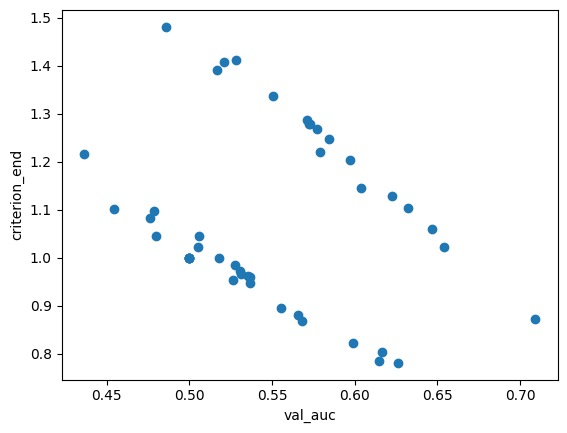

In [59]:
plt.scatter(bdd.val_auc, bdd.criterion_end)
plt.xlabel("val_auc")
plt.ylabel("criterion_end")

Text(0, 0.5, 'test_auc')

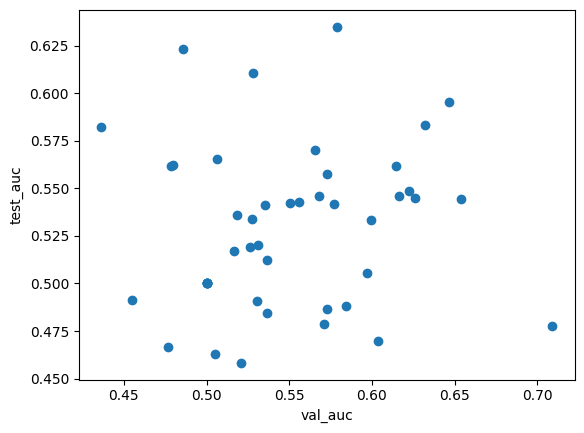

In [60]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")